# Klassifikation Kletterschuhe


## Daten

Eigene Datenerhebung mittels Online-Umfrage: https://forms.gle/PTs57af6sLqk32Wx7

Die Daten wurden getrennt in User-Daten und Schuhe

body_features.csv: Enthält alle Informationen rund um die Person (Geschlecht, Größe, Gewicht, Fußform, Fußmaße, Klettererfahrung)

shoe_survey.csv: Sämtliche von den Personen eingetragene Kletterschuhe (Marke, Modell, Eigenschaften, Bewertungen, etc.)



## Ziel: Schuhmodell vorhersagen

Kann mithilfe der Erfahrungsberichte und Körpereigenschaften der Befragten ein Kletterschuh vorhergesagt werden?

Target Label: shoe_model

# Explorative Analyse

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## body_features

In [2]:
users = pd.read_csv('./data/body_features.csv')

In [3]:
users.head(3)

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
0,1,Männlich,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0
1,2,Weiblich,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0
2,3,Männlich,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userid             94 non-null     int64  
 1   gender             94 non-null     object 
 2   height             94 non-null     int64  
 3   weight             94 non-null     int64  
 4   age                94 non-null     int64  
 5   foot_len           94 non-null     float64
 6   foot_width         94 non-null     float64
 7   foot_family        94 non-null     object 
 8   foot_deform        94 non-null     object 
 9   street_shoe_size   94 non-null     float64
 10  fav_sneaker_model  81 non-null     object 
 11  exp                94 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ KB


In [5]:
users.columns

Index(['userid', 'gender', 'height', 'weight', 'age', 'foot_len', 'foot_width',
       'foot_family', 'foot_deform', 'street_shoe_size', 'fav_sneaker_model',
       'exp'],
      dtype='object')

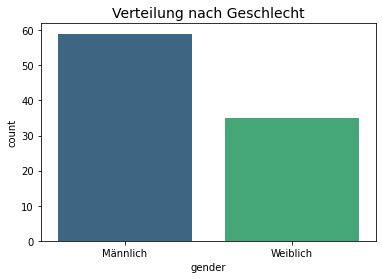

In [6]:
sns.countplot(x='gender', data=users, palette='viridis')
plt.title("Verteilung nach Geschlecht", fontsize=14)
plt.show()

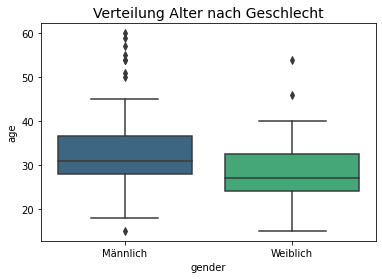

In [7]:
sns.boxplot(x='gender', y='age', data=users, palette='viridis')
plt.title("Verteilung Alter nach Geschlecht", fontsize=14)
plt.show()

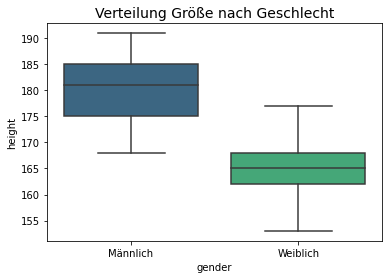

In [8]:
sns.boxplot(x='gender', y='height', data=users, palette='viridis')
plt.title("Verteilung Größe nach Geschlecht", fontsize=14)
plt.show()

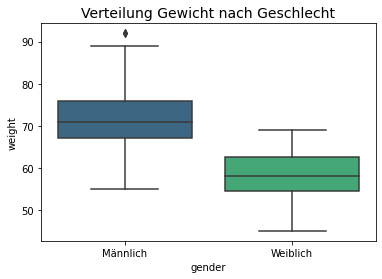

In [9]:
sns.boxplot(x='gender', y='weight', data=users, palette='viridis')
plt.title("Verteilung Gewicht nach Geschlecht", fontsize=14)
plt.show()

In [10]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp               43
Römischer Fußtyp                 30
Griechischer Fußtyp              20
Mix aus Römisch und Ägyptisch     1
Name: foot_family, dtype: int64

In [11]:
users[users['foot_family'] == 'Mix aus Römisch und Ägyptisch']

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
13,14,Weiblich,164,58,24,23.0,8.3,Mix aus Römisch und Ägyptisch,Senkfuß,38.0,Nike,3.0


In [12]:
users.at[13,'foot_family'] = 'Ägyptischer Fußtyp'

In [13]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp     44
Römischer Fußtyp       30
Griechischer Fußtyp    20
Name: foot_family, dtype: int64

## shoe_features

In [14]:
shoes = pd.read_csv('./data/shoe_survey.csv', usecols=['userid', 'shoe_model'])

# Feature Engineering

In [15]:
dummies = pd.get_dummies(shoes['shoe_model'], drop_first=True)

In [16]:
shoes = pd.concat([shoes.drop('shoe_model', axis=1),dummies],axis=1)

In [17]:
shoes.head(2)

,userid,Evolv - DEFY LACE,Evolv - KIRA,Five Ten - DRAGON VCS,Five Ten - HIANGLE,La Sportiva - COBRA,La Sportiva - FINALE VS,La Sportiva - FINALE WOMAN,La Sportiva - FUTURA,La Sportiva - KATANA,...,Scarpa - VAPOR V WMN,Scarpa - VELOCE WMN,Simond - ROCK+,So iLL - ZERO PRO,Sonstige,Tenaya - IATI,Tenaya - MASTIA,Tenaya - MUNDAKA,Tenaya - OASI,Tenaya - OASI LV
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userid             94 non-null     int64  
 1   gender             94 non-null     object 
 2   height             94 non-null     int64  
 3   weight             94 non-null     int64  
 4   age                94 non-null     int64  
 5   foot_len           94 non-null     float64
 6   foot_width         94 non-null     float64
 7   foot_family        94 non-null     object 
 8   foot_deform        94 non-null     object 
 9   street_shoe_size   94 non-null     float64
 10  fav_sneaker_model  81 non-null     object 
 11  exp                94 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ KB


In [19]:
users['gender'].value_counts()

Männlich    59
Weiblich    35
Name: gender, dtype: int64

In [20]:
dummies = pd.get_dummies(users['gender'],drop_first=True)
df = pd.concat([users.drop('gender',axis=1),dummies],axis=1)

In [21]:
df.head(3)

,userid,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich
0,1,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0,0
1,2,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0,1
2,3,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0,0


In [22]:
df.select_dtypes(['object']).columns

Index(['foot_family', 'foot_deform', 'fav_sneaker_model'], dtype='object')

In [23]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp     44
Römischer Fußtyp       30
Griechischer Fußtyp    20
Name: foot_family, dtype: int64

In [24]:
dummies = pd.get_dummies(df['foot_family'],drop_first=True)
df = pd.concat([df.drop('foot_family',axis=1),dummies],axis=1)
df.head(3)

,userid,height,weight,age,foot_len,foot_width,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich,Römischer Fußtyp,Ägyptischer Fußtyp
0,1,168,61,29,25.5,10.0,Nein,41.5,Vans Authentic,4.0,0,0,1
1,2,168,63,30,24.2,9.8,Hallux Valgus,38.5,Adidas cloudfoam,3.0,1,1,0
2,3,186,72,36,29.0,10.0,Nein,46.0,Black Diamond Mission LT,30.0,0,0,0


In [25]:
users['foot_deform'].value_counts()

Nein                                                        44
Spreizfuß                                                    9
Hallux Valgus                                                8
Plattfuß                                                     5
Senkfuß                                                      5
Knickfuß                                                     3
Nein, Spreizfuß                                              3
Hallux Valgus, Senkfuß                                       2
Nein, Knickfuß                                               2
Plattfuß, Spreizfuß                                          1
Hallux Valgus, Plattfuß                                      1
Nein, Senkfuß, Spreizfuß                                     1
Hallux Valgus, Plattfuß, Senkfuß, Spreizfuß                  1
Nein, Hallux Valgus, Senkfuß                                 1
Plattfuß, Senkfuß                                            1
Nein, Hallux Valgus                                    

In [26]:
users[users['foot_deform'] == 'Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfuß']

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
61,62,Weiblich,169,66,54,25.4,9.4,Römischer Fußtyp,"Nein, abgeflachtes Quergewölbe, aber noch kein...",40.0,"Laufschuhe von Joe Nimble, based on Bär",25.0


In [27]:
users.at[61,'foot_deform'] = 'Nein'
df.at[61,'foot_deform'] = 'Nein'

In [28]:
users['foot_deform'].value_counts()

Nein                                           45
Spreizfuß                                       9
Hallux Valgus                                   8
Plattfuß                                        5
Senkfuß                                         5
Knickfuß                                        3
Nein, Spreizfuß                                 3
Hallux Valgus, Senkfuß                          2
Nein, Knickfuß                                  2
Hallux Valgus, Plattfuß, Senkfuß, Spreizfuß     1
Hallux Valgus, Plattfuß                         1
Nein, Senkfuß, Spreizfuß                        1
Nein, Hallux Valgus, Senkfuß                    1
Plattfuß, Spreizfuß                             1
Plattfuß, Senkfuß                               1
Nein, Hallux Valgus                             1
Nein, Senkfuß                                   1
Fersenbein                                      1
Hohlfuß                                         1
Senkfuß, Spreizfuß                              1


In [29]:
df[df['foot_deform'] == 'Hallux Valgus, Senkfuß']

,userid,height,weight,age,foot_len,foot_width,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich,Römischer Fußtyp,Ägyptischer Fußtyp
11,12,177,65,25,27.0,10.0,"Hallux Valgus, Senkfuß",40.5,Adidas / Nikes,18.0,1,0,0
93,94,191,92,60,29.4,11.0,"Hallux Valgus, Senkfuß",46.5,NaN,23.0,0,0,0


In [30]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

deformations = ['Hallux Valgus', 'Senkfuß','Spreizfuß','Plattfuß', 'Hohlfuß','Knickfuß', 'Fersenbein']

for deform in deformations:
    df[deform.lower().split()[0]] = df.apply(lambda row: 1 if deform in strip_list(row.foot_deform.split(',')) else 0, axis=1)

df.head(12)

,userid,height,weight,age,foot_len,foot_width,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich,Römischer Fußtyp,Ägyptischer Fußtyp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,fersenbein
0,1,168,61,29,25.5,10.0,Nein,41.5,Vans Authentic,4.0,0,0,1,0,0,0,0,0,0,0
1,2,168,63,30,24.2,9.8,Hallux Valgus,38.5,Adidas cloudfoam,3.0,1,1,0,1,0,0,0,0,0,0
2,3,186,72,36,29.0,10.0,Nein,46.0,Black Diamond Mission LT,30.0,0,0,0,0,0,0,0,0,0,0
3,4,186,72,36,29.0,10.0,Nein,46.0,Black Diamond Mission LT,30.0,0,0,0,0,0,0,0,0,0,0
4,5,178,67,33,27.0,10.0,Hallux Valgus,42.0,Adidas Stan Smith,3.0,0,1,0,1,0,0,0,0,0,0
5,6,183,67,29,27.2,11.0,Spreizfuß,44.0,Adidas Stan Smith,2.0,0,0,1,0,0,1,0,0,0,0
6,7,183,68,26,26.5,10.5,Hallux Valgus,43.0,kangaroos,10.0,0,0,0,1,0,0,0,0,0,0
7,8,175,60,28,25.0,9.5,Nein,42.0,NaN,12.0,0,0,1,0,0,0,0,0,0,0
8,9,175,65,31,26.0,10.5,Nein,41.0,Halbschuhe von Hilfiger oder BoxFresh,11.0,0,0,1,0,0,0,0,0,0,0
9,10,181,79,29,29.0,10.0,"Nein, Spreizfuß",43.5,Vans,7.0,0,0,1,0,0,1,0,0,0,0


In [31]:
df.loc[11]

userid                                    12
height                                   177
weight                                    65
age                                       25
foot_len                                  27
foot_width                                10
foot_deform           Hallux Valgus, Senkfuß
street_shoe_size                        40.5
fav_sneaker_model             Adidas / Nikes
exp                                       18
Weiblich                                   1
Römischer Fußtyp                           0
Ägyptischer Fußtyp                         0
hallux                                     1
senkfuß                                    1
spreizfuß                                  0
plattfuß                                   0
hohlfuß                                    0
knickfuß                                   0
fersenbein                                 0
Name: 11, dtype: object

In [32]:
df = df.drop('fav_sneaker_model', axis=1)

In [33]:
df.select_dtypes(['object']).columns

Index(['foot_deform'], dtype='object')

In [34]:
df = df.drop('foot_deform', axis=1)

In [35]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [36]:
df.isnull().sum().sort_values(ascending=False)

fersenbein            0
knickfuß              0
height                0
weight                0
age                   0
foot_len              0
foot_width            0
street_shoe_size      0
exp                   0
Weiblich              0
Römischer Fußtyp      0
Ägyptischer Fußtyp    0
hallux                0
senkfuß               0
spreizfuß             0
plattfuß              0
hohlfuß               0
userid                0
dtype: int64

# Klassifizierung

## K-Nearest-Neighbor

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [39]:
scaler = StandardScaler()

X_std = scaler.fit_transform(df)
y = shoes.drop('userid',axis=1)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [94, 564]